# Analyzing Global Food Production Trends (1961-2023)

# Introduction
## This project aims to explore and analyze the global production of various food items across different countries from 1961 to 2023. The dataset encompasses a comprehensive record of the production quantities of essential food items like maize, rice, wheat, fruits, vegetables, and other agricultural products.

In [26]:
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd
df =pd.read_csv('world food production.csv')
df.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


In [5]:
df.shape

(11912, 24)

In [7]:
df.describe

<bound method NDFrame.describe of             Entity  Year  Maize Production (tonnes)  \
0      Afghanistan  1961                   700000.0   
1      Afghanistan  1962                   700000.0   
2      Afghanistan  1963                   713000.0   
3      Afghanistan  1964                   720000.0   
4      Afghanistan  1965                   720000.0   
...            ...   ...                        ...   
11907     Zimbabwe  2017                  1532572.0   
11908     Zimbabwe  2018                  1560100.0   
11909     Zimbabwe  2019                   773976.0   
11910     Zimbabwe  2020                  1202347.0   
11911     Zimbabwe  2021                  1469664.0   

       Rice  Production ( tonnes)  Yams  Production (tonnes)  \
0                       319000.00               7.467702e+06   
1                       319000.00               7.420515e+06   
2                       319000.00               8.479074e+06   
3                       380000.00               9

## Check for Null Values

In [8]:
df.isnull().sum()

Entity                                 0
Year                                   0
Maize Production (tonnes)              0
Rice  Production ( tonnes)             0
Yams  Production (tonnes)              0
Wheat Production (tonnes)              0
Tomatoes Production (tonnes)           0
Tea  Production ( tonnes )             0
Sweet potatoes  Production (tonnes)    0
Sunflower seed  Production (tonnes)    0
Sugar cane Production (tonnes)         0
Soybeans  Production (tonnes)          0
Rye  Production (tonnes)               0
Potatoes  Production (tonnes)          0
Oranges  Production (tonnes)           0
Peas, dry Production ( tonnes)         0
Palm oil  Production (tonnes)          0
Grapes  Production (tonnes)            0
Coffee, green Production ( tonnes)     0
Cocoa beans Production (tonnes)        0
Meat, chicken  Production (tonnes)     0
Bananas  Production ( tonnes)          0
Avocados Production (tonnes)           0
Apples Production (tonnes)             0
dtype: int64

## Replace 'Production (tonnes)' to make the header easy to read 

In [9]:
df.columns = df.columns.str.replace('Production \(tonnes\)', '', regex = True)
df.columns = df.columns.str.replace('Production \( tonnes\)', '', regex = True)
df.columns = df.columns.str.replace('Production \( tonnes \)', '', regex = True)

df.head()

,Entity,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


In [10]:
df.columns

Index(['Entity', 'Year', 'Maize ', 'Rice  ', 'Yams  ', 'Wheat ', 'Tomatoes ',
       'Tea  ', 'Sweet potatoes  ', 'Sunflower seed  ', 'Sugar cane ',
       'Soybeans  ', 'Rye  ', 'Potatoes  ', 'Oranges  ', 'Peas, dry ',
       'Palm oil  ', 'Grapes  ', 'Coffee, green ', 'Cocoa beans ',
       'Meat, chicken  ', 'Bananas  ', 'Avocados ', 'Apples '],
      dtype='object')

## Remove white spaces after column names

In [11]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Entity', 'Year', 'Maize', 'Rice', 'Yams', 'Wheat', 'Tomatoes', 'Tea',
       'Sweet potatoes', 'Sunflower seed', 'Sugar cane', 'Soybeans', 'Rye',
       'Potatoes', 'Oranges', 'Peas, dry', 'Palm oil', 'Grapes',
       'Coffee, green', 'Cocoa beans', 'Meat, chicken', 'Bananas', 'Avocados',
       'Apples'],
      dtype='object')


## Statistics

In [28]:
Wheat_mean = df['Wheat'].mean()
print(Wheat_mean)

23656842.93575755


In [27]:
df['Rice'].std()

77497792.9570716

## Data Visualization

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

#Time series Plot for Oranges over the years in Australia
Oranges_Aus = df[(df['Entity'] == 'Australia') & (df['Oranges']>0)]
Oranges_Aus.head()

,Entity,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
696,Australia,1961,158630.0,422977.53,7148.75,31818744.0,371577.56,110.0,611980.0,25911.0,...,8684.0,57998.0,7733.0,331428.0,359.80,73030.61,39536640.0,0.0,16000.0,185244.0
697,Australia,1962,185613.0,622.00,3603.79,20941134.0,386376.00,100.0,548155.0,983.0,...,9350.0,70709.0,6300.0,367130.0,356.64,68279.22,40877240.0,0.0,16000.0,387950.0
698,Australia,1963,189415.0,1124.00,11050.37,17597560.0,329188.00,130.0,557545.0,855.0,...,9459.0,85682.0,5948.0,309920.0,377.06,88849.53,41739376.0,0.0,17000.0,239210.0
699,Australia,1964,170745.0,1029.00,5937.57,14480217.0,297474.44,100.0,543920.0,2690.0,...,9209.0,89615.2,6600.0,319790.0,378.98,84905.95,43449830.0,0.0,18000.0,258220.0
700,Australia,1965,174733.0,3807.00,6950.01,31922554.0,336888.47,130.0,511687.0,2762.0,...,8441.0,5900.0,6665.0,328040.0,370.89,89856.22,43126830.0,0.0,20000.0,206290.0


### Time series Plot for Oranges over the years in Australia

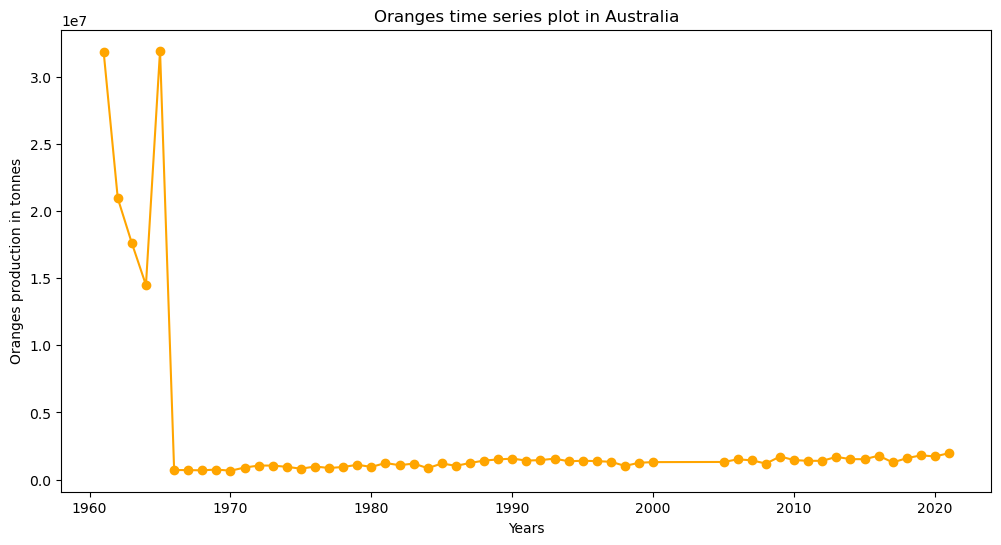

In [37]:
plt.figure(figsize = (12,6))
plt.plot(Oranges_Aus['Year'], Oranges_Aus['Wheat'], marker = 'o', linestyle= '-', color ='orange')
plt.title('Oranges time series plot in Australia')
plt.xlabel('Years')
plt.ylabel('Oranges production in tonnes')
plt.show()

### We see that orange production was at peak twice between 1960 and 1970. After that it dropped down drastically and remained almost negligible at a constant level.

### Time Series of Tea Production In India

In [15]:
tea_india = df[(df['Entity'] == 'India') & (df['Tea']>0)]
tea_india

,Entity,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
5001,India,1961,4312000.0,212613040.0,484023.0,19600.0,216405.0,98653.2,5192.00,187.0,...,46400.00,65853.0,1810.800,130.0,88943.00,293.50,6101.00,140.0,217003.0,711481.00
5002,India,1962,4607000.0,223857390.0,530502.0,18448.0,241371.0,56924.0,5157.00,134.0,...,48206.98,69395.0,1810.800,132.0,78634.00,329.00,6463.00,140.0,221820.0,726134.00
5003,India,1963,4561000.0,195630930.0,604732.0,17618.0,232157.0,214075.6,5196.00,98.0,...,50000.00,60081.0,4149675.646,133.0,75454.00,401.06,6826.00,140.0,216076.0,708554.70
5004,India,1964,4664000.0,222527140.0,683039.0,16218.0,220163.0,21215.6,5181.67,141.0,...,51668.31,102934.0,630.000,113.0,72342.00,500.00,7199.00,100.0,206446.0,739196.25
5005,India,1965,4823000.0,214269550.0,696147.0,14000.0,310680.0,56924.0,5127.75,288.0,...,53345.42,116922.0,1810.800,28.0,68822.93,500.00,7678.00,100.0,218502.0,726171.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,India,2017,25899870.0,7741433.0,17100.0,861030.0,11200.0,370.0,799.00,7577.0,...,4740715.00,81600.0,1561.200,189.0,42.26,13000.00,361187.12,8113923.0,20283.0,333741.00
5058,India,2018,28752880.0,7534393.0,15800.0,1056690.0,13200.0,370.0,1136.00,6443.0,...,5037289.00,70200.0,1339.400,196.0,41.01,15000.00,900.00,8419467.0,21135.0,351916.00
5059,India,2019,27715100.0,7883223.0,8104.0,691417.0,10200.0,370.0,1220.00,3947.1,...,4197790.50,94500.0,1282.082,200.0,42.71,15000.00,900.00,8797595.0,21967.0,351232.00
5060,India,2020,28765860.0,8742643.0,9682.0,406484.0,12700.0,370.0,1091.00,594.0,...,5762764.50,89000.0,1276.200,194.0,44.81,18000.00,945.00,8741036.0,26581.0,348440.00


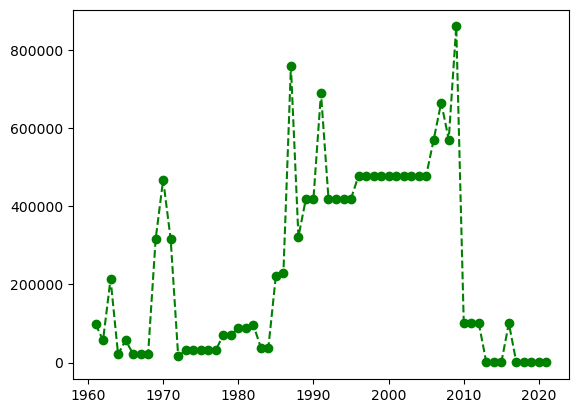

In [39]:
plt.plot(tea_india['Year'], tea_india['Tea'], marker = 'o', ls = '--', color ='green')
plt.show()

### We see an overall rise in tea production of india till 2010 after which it reduced substantially

In [52]:
wheat_world = df[df['Wheat'] > 0]

wheat_yearly = wheat_world.groupby('Year')['Wheat'].sum().reset_index()
wheat_yearly

,Year,Wheat
0,1961,4.104986e+09
1,1962,4.308814e+09
2,1963,4.181401e+09
3,1964,4.216309e+09
4,1965,4.281537e+09
...,...,...
56,2017,5.701665e+09
57,2018,5.991785e+09
58,2019,6.011762e+09
59,2020,5.560685e+09


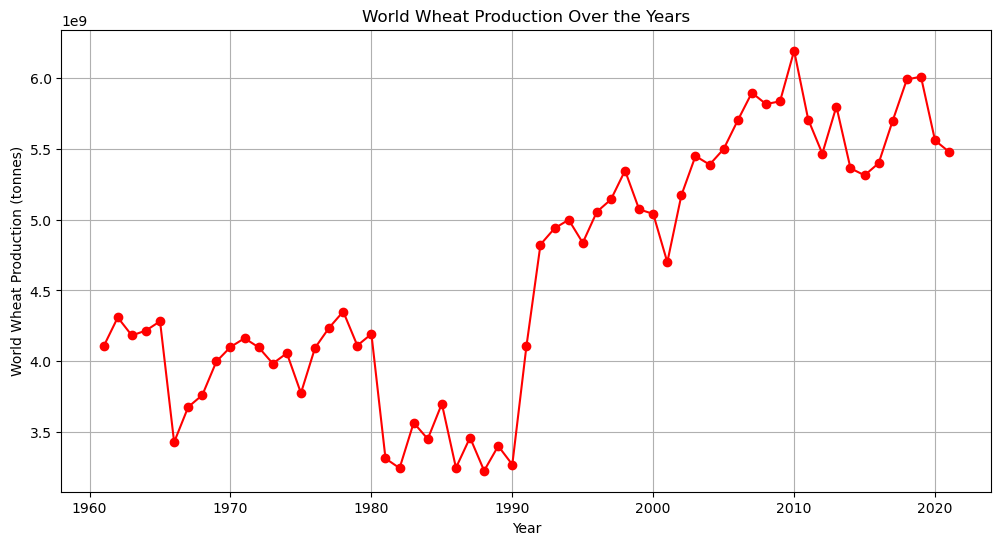

In [153]:
from importlib import reload

reload(plt)
plt.figure(figsize=(12, 6))
plt.plot(wheat_yearly['Year'],wheat_yearly['Wheat'],marker='o', linestyle='-', color='red')

plt.title('World Wheat Production Over the Years')
plt.xlabel('Year')
plt.ylabel('World Wheat Production (tonnes)')
plt.grid(True)
plt.show()

### Overall Wheat Production has increased with time due to advent of technology and resources

In [19]:
df.head()

,Entity,Year,Maize,Rice,Yams,Wheat,Tomatoes,Tea,Sweet potatoes,Sunflower seed,...,Oranges,"Peas, dry",Palm oil,Grapes,"Coffee, green",Cocoa beans,"Meat, chicken",Bananas,Avocados,Apples
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


### Plotting Correlation Between Fruits and Major Crops

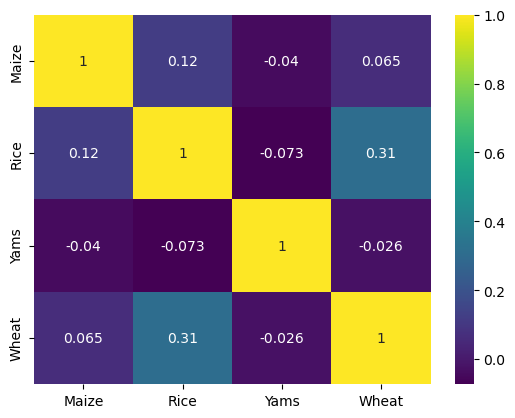

In [152]:
columns = ['Maize', 'Rice', 'Yams', 'Wheat']
df_corr = df[columns]

sns.heatmap(df_corr.corr(), annot = True, cmap = 'viridis')
plt.show()

### Analyzing Data for a Specific Crop 

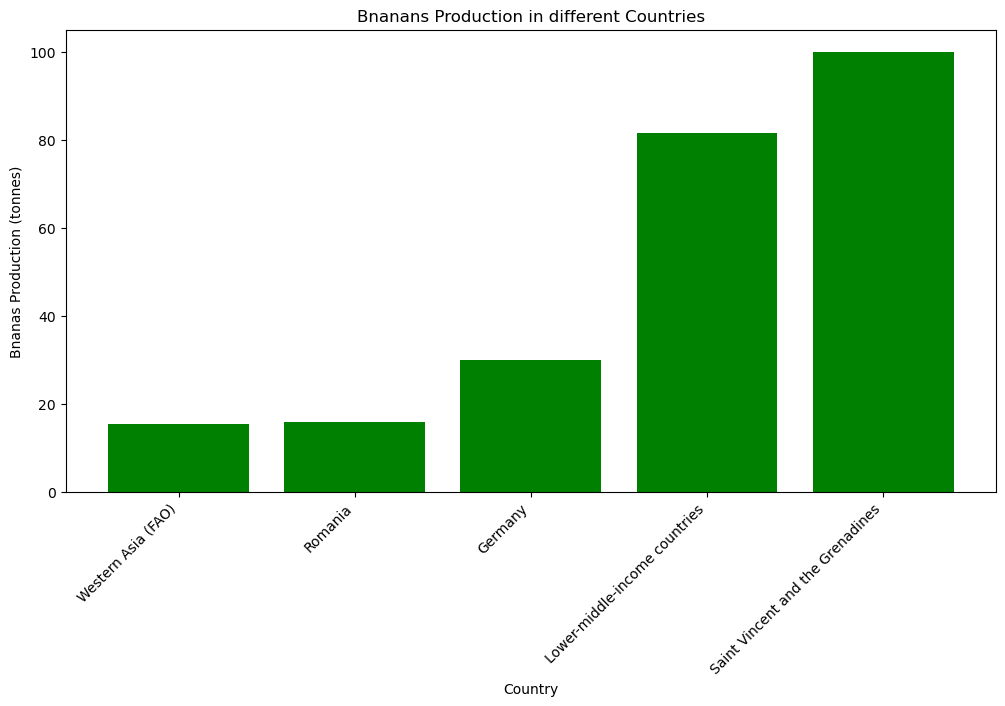

In [76]:
 crop_data= df[(df['Year'] == 2020) & (df['Bananas']>0)]
sorted_crop_data = crop_data.sort_values(by = 'Bananas', ascending= True)

#Top 5 countries
top_crop_data = sorted_crop_data.head(5)
plt.figure(figsize =(12,6))
plt.bar(top_crop_data['Entity'], top_crop_data['Bananas'], color ='green')
plt.title('Bnanans Production in different Countries')
plt.xlabel('Country')
plt.ylabel('Bnanas Production (tonnes)')
plt.grid = True
plt.xticks(rotation = 45, ha='right')
plt.show()

### We infer that Saint Vincent and the Grenadines were highest producers of Bananas for the year 2020